# EDA 

## Packages & Data

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.data_loader import DataLoader

In [3]:
pd.set_option("display.max_rows", None)

In [4]:
dataloader = DataLoader()
df_base = dataloader.load_transform("../../data/Trainings_Datensatz.csv")
df = dataloader.date_feature_extraction(df_base)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/raw/raw_dataset.csv'

## Data Structure

In [5]:
print(f"len: {len(df)}")
print(f"Count Unique IDs: {df['id'].nunique()}")
print(f"Count Unique species: {df['species'].nunique()}")

len: 4074354
Count Unique IDs: 28212
Count Unique species: 7


In [6]:
print(df["time"].min())
print(df["time"].max())

2017-01-01 00:00:00
2022-11-02 00:00:00


## Data Validation

In [18]:
# is id + species unique? -> yes
df_grouped = df.groupby("id")["species"].nunique()
len(df_grouped[df_grouped > 1])

0

In [17]:
# is id + disturbance_year unique? -> yes
df_grouped = df.groupby("id")["disturbance_year"].nunique()
len(df_grouped[df_grouped > 1])

0

In [9]:
# nulls or "" ? -> no
null_counts = df.isnull().sum()
empty_string_counts = (df == "").sum()

print(null_counts[null_counts > 0])
print(empty_string_counts[empty_string_counts > 0])

date_diff    28212
dtype: int64
Series([], dtype: int64)


## Plot Data

max: 253
min: 30
mean: 144.42
median: 155.0
std: 40.62


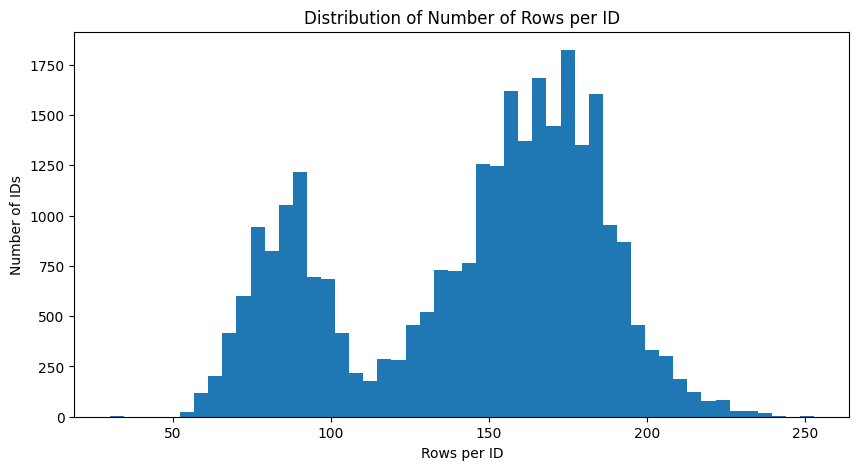

In [10]:
rows_per_id = df.groupby("id").size()

print(f"max: {rows_per_id.max()}")
print(f"min: {rows_per_id.min()}")
print(f"mean: {rows_per_id.mean():.2f}")
print(f"median: {rows_per_id.median()}")
print(f"std: {rows_per_id.std():.2f}")

plt.figure(figsize=(10, 5))
plt.hist(rows_per_id, bins=50)
plt.xlabel("Rows per ID")
plt.ylabel("Number of IDs")
plt.title("Distribution of Number of Rows per ID")
plt.show()

max: 401.0
min: 0.0
mean: 14.36
median: 8.0
std: 18.86


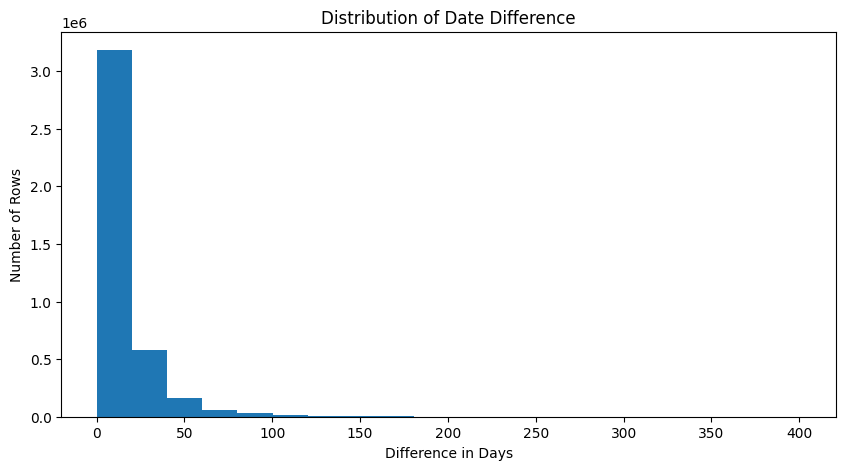

In [11]:
print(f"max: {df['date_diff'].max()}")
print(f"min: {df['date_diff'].min()}")
print(f"mean: {df['date_diff'].mean():.2f}")
print(f"median: {df['date_diff'].median()}")
print(f"std: {df['date_diff'].std():.2f}")

plt.figure(figsize=(10, 5))
plt.hist(df["date_diff"], bins=20)
plt.xlabel("Difference in Days")
plt.ylabel("Number of Rows")
plt.title("Distribution of Date Difference")
plt.show()

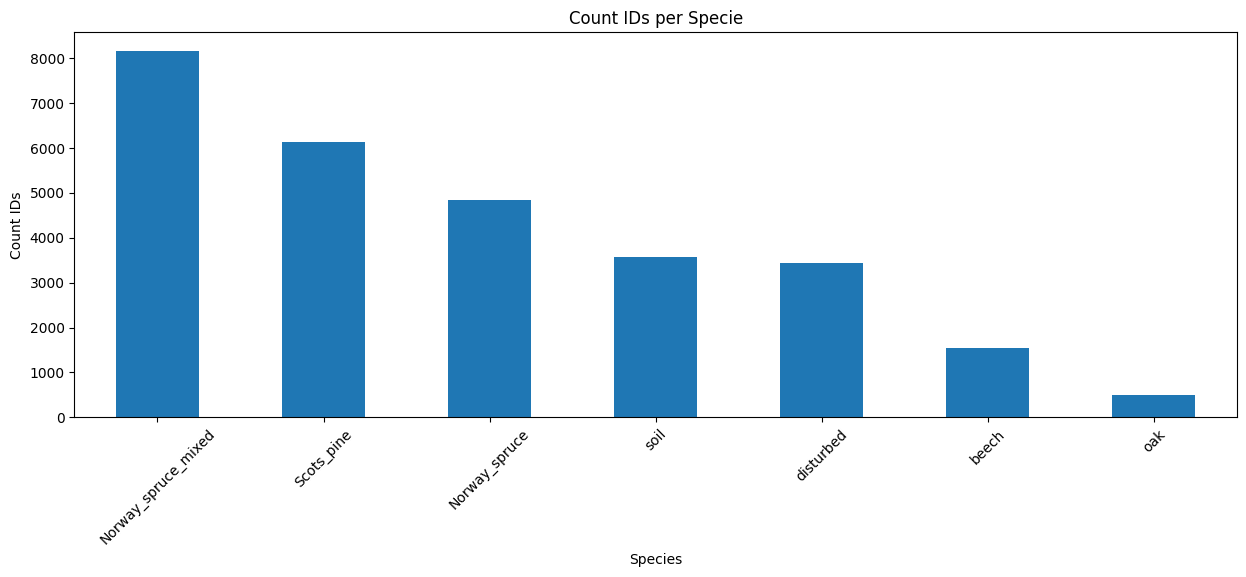

In [12]:
df_grouped = df.groupby("id")["species"].first()
species_counts = df_grouped.value_counts()

plt.figure(figsize=(15, 5))
species_counts.plot(kind="bar")
plt.xlabel("Species")
plt.ylabel("Count IDs")
plt.title("Count IDs per Specie")
plt.xticks(rotation=45)
plt.show()

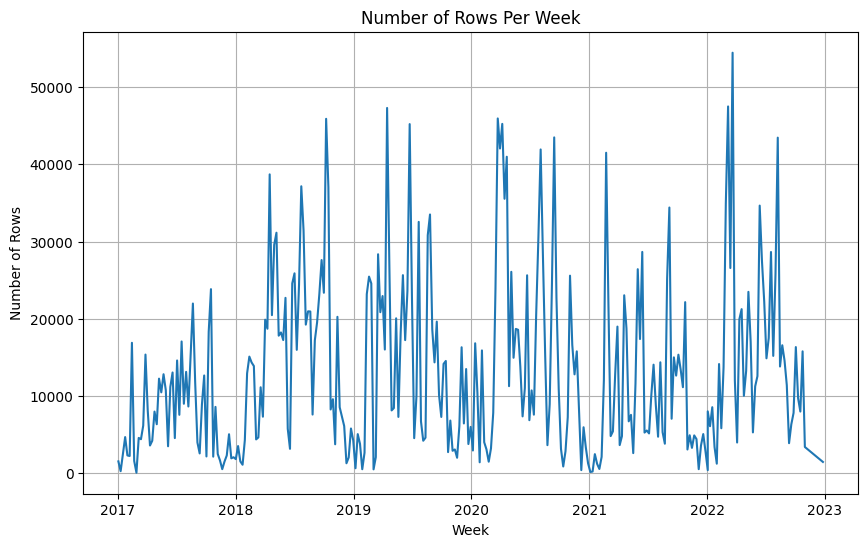

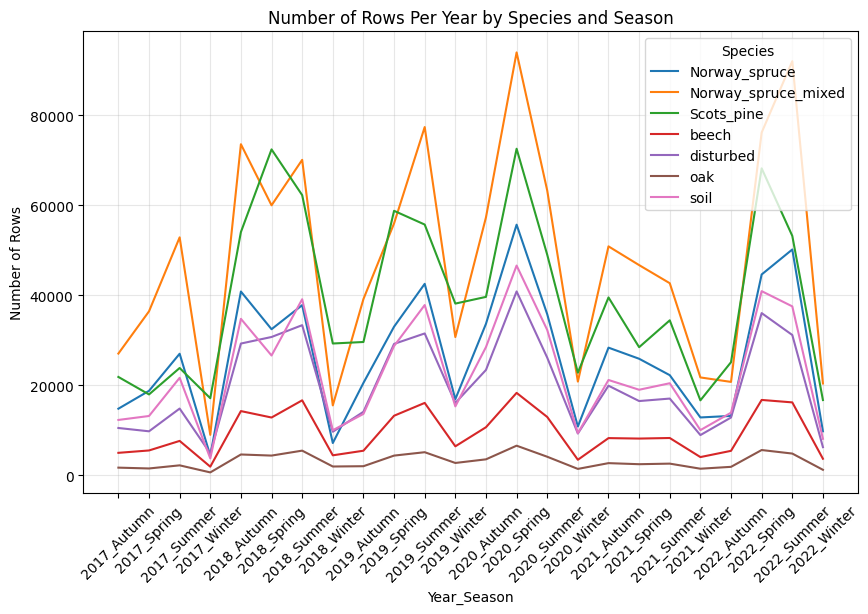

In [13]:
# Data by time

# Plot by week
df["week"] = df["time"].dt.isocalendar().week
df["year"] = df["time"].dt.year

count_per_week = df.groupby(["year", "week"]).size().reset_index(name="count")
count_per_week["week_start"] = pd.to_datetime(
    count_per_week["year"].astype(str)
    + "-"
    + count_per_week["week"].astype(str)
    + "-1",
    format="%G-%V-%u",
)

plt.figure(figsize=(10, 6))
plt.plot(count_per_week["week_start"], count_per_week["count"])
plt.xlabel("Week")
plt.ylabel("Number of Rows")
plt.title("Number of Rows Per Week")
plt.grid(True)
plt.show()

# plot by season and species
df["year"] = df["time"].dt.year
count_per_year_season_species = (
    df.groupby(["year", "season", "species"]).size().reset_index(name="count")
)
count_per_year_season_species["year_season"] = (
    count_per_year_season_species["year"].astype(str)
    + "_"
    + count_per_year_season_species["season"]
)

plt.figure(figsize=(10, 6))
for species, group in count_per_year_season_species.groupby("species"):
    plt.plot(group["year_season"], group["count"], label=species, alpha=1)

plt.xlabel("Year_Season")
plt.ylabel("Number of Rows")
plt.title("Number of Rows Per Year by Species and Season")
plt.xticks(rotation=45)
plt.legend(title="Species")
plt.grid(True, alpha=0.3)
plt.show()

## Feature Analysis

In [14]:
# tbd